In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pomegranate as pom
import pickle

In [2]:
import import_ipynb
import readSequenceFunctions as rsf

importing Jupyter notebook from readSequenceFunctions.ipynb


In [3]:
np.set_printoptions(precision=8, linewidth=100, suppress=True)

In [4]:
rsf.usedCoding.changeCoding(3)
seqDict,seqDictT,trainList,trainNamesList,testList,testNamesList=rsf.traindAndTestDataset(rsf.pathsBCE, testSize=0)

## Model M1

In [5]:
d1=[pom.NormalDistribution(0.1,0.1), pom.NormalDistribution(1,0.000001)]
d1[-1].freeze()

In [6]:
transM=np.array([[1,1],
                 [0,0]])
end=np.array([0,1])
start=np.array([1,0])

In [7]:
m1=pom.hmm.HiddenMarkovModel.from_matrix(transM,d1,start,end)

In [8]:
val=m1.fit(trainList,verbose=True,stop_threshold=1)

[1] Improvement: 3057643.1007274115	Time (s): 0.6897
[2] Improvement: 2.1886080503463745e-08	Time (s): 0.7242
Total Training Improvement: 3057643.1007274333
Total Training Time (s): 2.1030


## Model M3

In [9]:
distr=[pom.NormalDistribution(0.1,0.1) for i in range(3)]
distr.append(pom.NormalDistribution(1,0.000001))
distr[3].freeze()

In [10]:
plt.gcf().set_size_inches(15,5)
distr[0].plot(1000000, bins=300)
distr[3].plot(1000, bins=300)

In [11]:
transM=np.array([[1,1,0,0],
                 [0,1,1,0],
                 [0,0,1,1],
                 [0,0,0,0]])
end=np.array([0,0,0,1])
start=np.array([1,0,0,0])

In [12]:
model=pom.hmm.HiddenMarkovModel.from_matrix(transM,distr,start,end)

In [13]:
val=model.fit(trainList,verbose=True,stop_threshold=1)

[1] Improvement: 2997945.1540036267	Time (s): 1.838
[2] Improvement: 570.1063140388578	Time (s): 1.767
[3] Improvement: 1329.2564232167788	Time (s): 1.768
[4] Improvement: 1404.470309057273	Time (s): 1.757
[5] Improvement: 1278.6132843811065	Time (s): 1.773
[6] Improvement: 1791.0957461078651	Time (s): 1.785
[7] Improvement: 1621.5971676106565	Time (s): 1.824
[8] Improvement: 817.4155036672018	Time (s): 1.781
[9] Improvement: 337.7910979948938	Time (s): 1.939
[10] Improvement: 185.9067782969214	Time (s): 1.852
[11] Improvement: 150.55010302737355	Time (s): 1.819
[12] Improvement: 145.29984158230945	Time (s): 1.837
[13] Improvement: 142.99967760127038	Time (s): 1.789
[14] Improvement: 145.4642847236246	Time (s): 1.868
[15] Improvement: 162.47063542623073	Time (s): 1.802
[16] Improvement: 184.1733152908273	Time (s): 1.85
[17] Improvement: 206.07302046427503	Time (s): 1.847
[18] Improvement: 231.1830001026392	Time (s): 1.814
[19] Improvement: 267.7465058779344	Time (s): 1.831
[20] Improve

In [14]:
model.dense_transition_matrix()

array([[0.99299093, 0.00700907, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.89672959, 0.10327041, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99317061, 0.00682939, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        ]])

In [15]:
model.states

[{
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "name" : "NormalDistribution",
         "parameters" : [
             0.026012009187073578,
             0.029002930940080593
         ],
         "frozen" : false
     },
     "name" : "s0",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "name" : "NormalDistribution",
         "parameters" : [
             0.005207857039682656,
             0.0030632623028491
         ],
         "frozen" : false
     },
     "name" : "s1",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "name" : "NormalDistribution",
         "parameters" : [
             0.02691316430784288,
             0.029494945574424232
         ],
         "frozen" : false
     },
     "name" : "s2",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Di

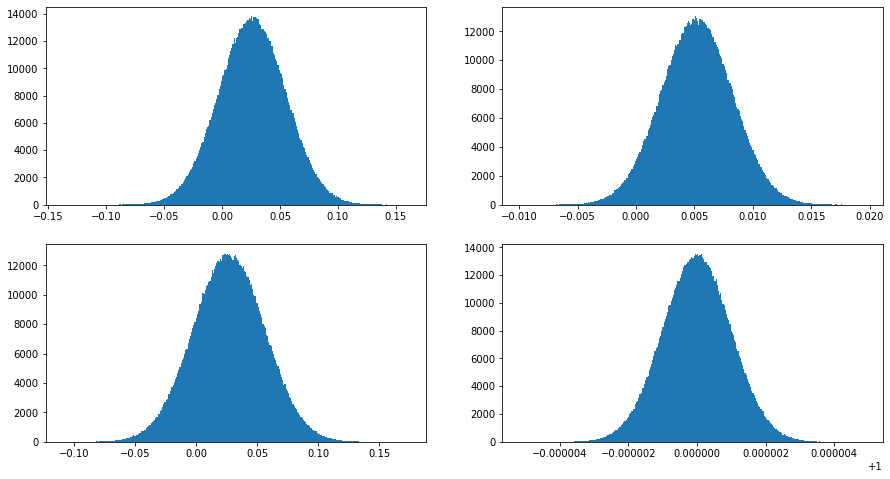

In [16]:
plt.gcf().set_size_inches(15,8)
i=0
for d in distr:
    i+=1
    plt.subplot(2,2,i)
    d.plot(1000000, bins=300)

In [17]:
len(trainList)

5932

In [18]:
s1=m1.summarize(trainList)
s1

3795116.3236036217

In [19]:
s3=model.summarize(trainList)
s3

3870023.683768859

In [20]:
(s3-s1)/len(trainList)

12.62767366237988

In [21]:
model.log_probability(trainList[0])

408.02086421716945

In [24]:
model.state_count()

6

In [25]:
model.states

[{
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "name" : "NormalDistribution",
         "parameters" : [
             0.026012009187073578,
             0.029002930940080593
         ],
         "frozen" : false
     },
     "name" : "s0",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "name" : "NormalDistribution",
         "parameters" : [
             0.005207857039682656,
             0.0030632623028491
         ],
         "frozen" : false
     },
     "name" : "s1",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "name" : "NormalDistribution",
         "parameters" : [
             0.02691316430784288,
             0.029494945574424232
         ],
         "frozen" : false
     },
     "name" : "s2",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Di

In [26]:
model.predict(trainList[0],"viterbi")

[4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 5]

In [30]:
model.states[3].distribution is None

False